# This code uses visualization tools to viz your suite2p results!

In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile

import xmltodict

import suite2p

import fastplotlib as fpl

In [2]:
# Figure Style settings for notebook.
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (9, 9),
    'ytick.major.left': False,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_53077/2408554817.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mpl.cm.get_cmap('jet')


# Set suite2p output path

In [4]:
# movies and associated frame rates
output_path = r"/Users/js0403/2p/NA4/suite2p/plane0"
listed_data = os.listdir(output_path)

# loads in your data and automatically assigns their inputs
var_names =[]
for i in listed_data:
    if '.npy' in i:
        if 'ops' in i:
            globals()[i.split('.')[0]]=np.load(os.path.join(output_path,i),allow_pickle=True).item()
            pass
        else:
            globals()[i.split('.')[0]]=np.load(os.path.join(output_path,i),allow_pickle=True)
        var_names.append([i.split('.')[0]])
print("These are the variables:",var_names)

'''
F = np.load('F.npy', allow_pickle=True)
Fneu = np.load('Fneu.npy', allow_pickle=True)
spks = np.load('spks.npy', allow_pickle=True)
stat = np.load('stat.npy', allow_pickle=True)
ops =  np.load('ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load('iscell.npy', allow_pickle=True)
'''


These are the variables: [['Fneu'], ['spks'], ['ops'], ['iscell'], ['F'], ['stat'], ['stat_corrupted']]


"\nF = np.load('F.npy', allow_pickle=True)\nFneu = np.load('Fneu.npy', allow_pickle=True)\nspks = np.load('spks.npy', allow_pickle=True)\nstat = np.load('stat.npy', allow_pickle=True)\nops =  np.load('ops.npy', allow_pickle=True)\nops = ops.item()\niscell = np.load('iscell.npy', allow_pickle=True)\n"

### Outputs from the Suite2p Pipeline

#### Ops dictionaries

run_s2p() returns one ops dictionary for each plane processed.

In [5]:
len(ops)

130

The ops dictionary contains all the keys that went into the analysis, plus new keys that contain additional metrics/outputs calculated during the pipeline run.

In [7]:
if len(ops['data_path'])>1 or len(ops['tiff_list'])>1:
    print("This code does not support multi-file registration")
else:
    data_path = os.path.join(ops['data_path'][0],ops['tiff_list'][0])
    print(data_path)

/Users/js0403/2p/NA4/img.tif


In [8]:
ops.keys()

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass'

#### Results Files

In [9]:
list(Path(ops['save_path']).iterdir())

[PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/Fneu.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/spks.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/ops.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/iscell.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/F.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/stat.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/mod.png'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/stat_corrupted.npy'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/mod.h5'),
 PosixPath('/Users/js0403/2p/NA4/suite2p/plane0/data.bin')]

The output parameters can also be found in the "ops.npy" file.  This is especially useful when running the pipeline from the terminal or the graphical interface.  It contains the same data that is output from the python `run_s2p()` function.

In [10]:
output_op_file = np.load(Path(ops['save_path']).joinpath('ops.npy'), allow_pickle=True).item()
output_op_file.keys() == ops.keys()

True

The other files will be used for the visualizations below.

## Visualizations

### Registration

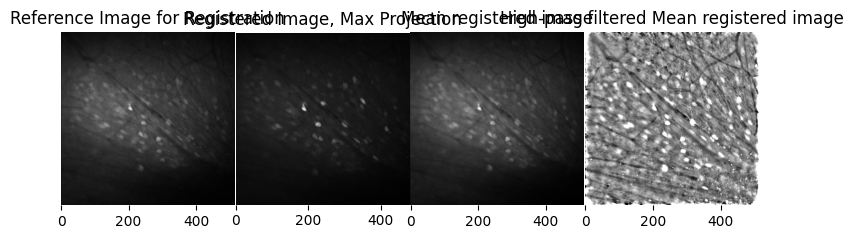

In [11]:
plt.subplot(1, 4, 1)
plt.imshow(ops['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(1, 4, 2)
plt.imshow(ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(1, 4, 3)
plt.imshow(ops['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(1, 4, 4)
plt.imshow(ops['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

### Detection


In [12]:
stats_file = Path(ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape

((18,), (18,))

/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_53077/829472250.py:9: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im, axis=0), cmap='jet')
/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_53077/829472250.py:13: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_53077/829472250.py:17: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')


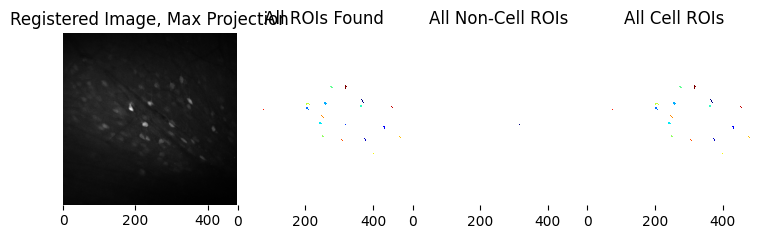

In [13]:
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=ops['Ly'], Lx=ops['Lx'], label_id=True)
im[im == 0] = np.nan

plt.subplot(1, 4, 1)
plt.imshow(ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection")

plt.subplot(1, 4, 2)
plt.imshow(np.nanmax(im, axis=0), cmap='jet')
plt.title("All ROIs Found")

plt.subplot(1, 4, 3)
plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
plt.title("All Non-Cell ROIs")

plt.subplot(1, 4, 4)
plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");


In [14]:
images = tifffile.memmap(data_path)
images.shape

(8000, 512, 512)

The `cell_roi` variable is a matrix with different numerical values set for different components so that we can distinguish them. For the purposes of this visualization, set them to all be one value

/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_53077/2472200102.py:1: RuntimeWarning: All-NaN slice encountered
  cell_roi = np.nanmax(im[iscell], axis=0)


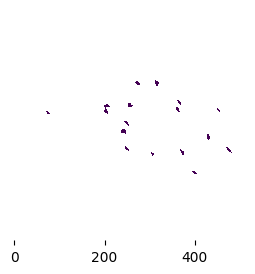

In [15]:
cell_roi = np.nanmax(im[iscell], axis=0)
cell_roi.shape
cell_roi[~np.isnan(cell_roi)]=20
plt.figure(figsize=(3,3))
plt.imshow(cell_roi)

In [16]:
#%% Watch the movie
iw_movie = fpl.ImageWidget(
    data=images,
    slider_dims=["t"],
    cmap="gray"
)
iw_movie.show(sidecar=True)

RFBOutputContext()

/Users/js0403/anaconda3/envs/suite2p/lib/python3.9/site-packages/fastplotlib/graphics/_features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)'))), IpywidgetImageWidgetToolbar(children=(HBox

In [17]:
#%% Watch the movie
iw_movie = fpl.ImageWidget(
    data=images,
    slider_dims=["t"],
    cmap="gray"
)

# add a column to overlay functional activity on structural video
struct_rgba = np.zeros((512, 512, 4), dtype=np.float32)
struct_rgba[:, :, 1] = cell_roi
struct_rgba[..., -1] = 10
iw_movie.gridplot[0,0].add_image(struct_rgba, name='struct')
iw_movie.gridplot[0,0]
iw_movie.gridplot[0,0]["struct"].data[..., -1] = .3
#iw_movie.gridplot[0,0].add_image(cell_roi, name='struct')
iw_movie.show(sidecar=True)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)'))), IpywidgetImageWidgetToolbar(children=(HBox

## Extract Traces


In [14]:
f_cells = np.load(Path(output_ops['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(output_ops['save_path']).joinpath('Fneu.npy'))
spks = np.load(Path(output_ops['save_path']).joinpath('spks.npy'))
f_cells.shape, f_neuropils.shape, spks.shape

((27, 8000), (27, 8000), (27, 8000))

In [ ]:
plt.figure(figsize=[20,20])
plt.suptitle("Flourescence and Deconvolved Traces for Different ROIs", y=0.92);
rois = np.arange(len(f_cells))[::20]
for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi]
    f_neu = f_neuropils[roi]
    sp = spks[roi]
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin 
    sp /= sp.max()
    sp *= frange
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
    plt.plot(sp + fmin, label="Deconvolved")
    plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
    plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))